In [1]:
#import packages to be able to read image files and convert to arrays for learning, plotting and getting metrics on predictions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report
from PIL import Image,ImageOps

In [2]:
#Build Training data
X_train=[]
y_train=[]
#Load arrays for each of the positive classes in training data and add a label of 1
src="images/training/flip/"
files=os.listdir(src)
for file in files:
    X_train.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_train.append(1)

In [3]:
#load arrays for each of the negative classes in training data and add a label of 0
src="images/training/notflip/"
files=os.listdir(src)
for file in files:
    X_train.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_train.append(0)

In [4]:
#Build test data
X_test=[]
y_test=[]
#load arrays for each of the positive classes in test data and add a label of 1
src="images/testing/flip/"
files=os.listdir(src)
for file in files:
    X_test.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_test.append(1)

In [5]:
#load arrays for each of the negative classes in test data and add a label of 0
src="images/testing/notflip/"
files=os.listdir(src)
for file in files:
    X_test.append(np.array(ImageOps.grayscale(Image.open(src+file))))
    y_test.append(0)

In [6]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [7]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [8]:
X_train.shape

(2392, 1920, 1080)

In [9]:
X_test.shape

(597, 1920, 1080)

In [10]:
#Reshape to make these work for keras neural network
X_train=X_train.reshape(2392,1920,1080,1)
X_test=X_test.reshape(597,1920,1080,1)

In [12]:
#Import packages to build neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [13]:
#Create the model
cnn=Sequential()
#initially 16 convolution nodes
cnn.add(Conv2D(16,(3,3),padding="same",activation='relu',input_shape=X_train.shape[1:]))
#add a Max Pooling layer
cnn.add(MaxPooling2D())
#another 16 convolution nodes
cnn.add(Conv2D(16,(3,3),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Add 8 convolutions
cnn.add(Conv2D(8,(2,2),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Flatten before adding fully connected layer
cnn.add(Flatten())
#Add a hidden layer with 50 nodes
cnn.add(Dense(50,activation='relu'))
#Add another hidden layer with 25 nodes
cnn.add(Dense(25,activation='relu'))
#Add final output layer with 1 output nodes using sigmoid
cnn.add(Dense(1,activation='sigmoid'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1920, 1080, 16)    160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 960, 540, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 960, 540, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 480, 270, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 480, 270, 8)       520       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 240, 135, 8)      0

In [15]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [16]:
#train the network
history=cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
75/75 [==============================] - 1114s 15s/step - loss: 10.2263 - accuracy: 0.7454 - val_loss: 0.1682 - val_accuracy: 0.9414
Epoch 2/10
75/75 [==============================] - 1071s 14s/step - loss: 0.0677 - accuracy: 0.9758 - val_loss: 0.0439 - val_accuracy: 0.9883
Epoch 3/10
75/75 [==============================] - 1096s 15s/step - loss: 0.0665 - accuracy: 0.9824 - val_loss: 0.0686 - val_accuracy: 0.9832
Epoch 4/10
75/75 [==============================] - 1082s 14s/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.0187 - val_accuracy: 0.9933
Epoch 5/10
75/75 [==============================] - 1078s 14s/step - loss: 3.2321e-04 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9916
Epoch 6/10
75/75 [==============================] - 1080s 14s/step - loss: 6.2576e-05 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9933
Epoch 7/10
75/75 [==============================] - 1066s 14s/step - loss: 3.7589e-05 - accuracy: 1.0000 - val_loss: 0.0184 - val_acc

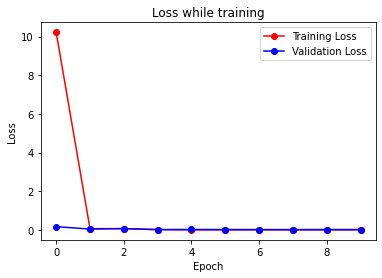

In [17]:
plt.plot(history.history["loss"],color="r",marker="o")
plt.plot(history.history["val_loss"],color="b",marker="o")
plt.title("Loss while training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.show()

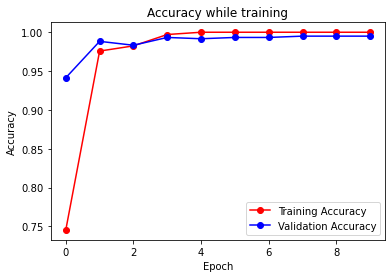

In [18]:
plt.plot(history.history["accuracy"],color="r",marker="o")
plt.plot(history.history["val_accuracy"],color="b",marker="o")
plt.title("Accuracy while training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [19]:
y_pred=cnn.predict(X_test)>=0.5

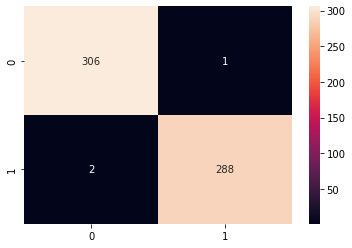

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.show()

In [21]:
print(f1_score(y_test,y_pred))

0.9948186528497409


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       307
           1       1.00      0.99      0.99       290

    accuracy                           0.99       597
   macro avg       1.00      0.99      0.99       597
weighted avg       0.99      0.99      0.99       597



In [23]:
print(accuracy_score(y_test,y_pred))

0.9949748743718593


We were able to acheive very good accuracy on this data set to use a single image to predict if it was from a page being flipped or not. We had 99.5% accuracy on the test data with only 3 out of 597 images being misclassified. The F1-score was also about 0.995. This model should be fine to use to detect if someone is flipping a page.

Some further work that could be done is to take the images that are in the data, and apply some minor transformations to them (e.g. slightly rotated) to give some additional data to help in case the scanner is not at the same angle as it was in this experiment.